# 🔬 Beijing Air Quality
## 📘 Notebook 02 – Data Cleaning

| Field         | Description                                        |
|:--------------|:---------------------------------------------------|
| Author:       |	Robert Steven Elliott                            |
| Course:       |	Code Institute – Data Analytics with AI Bootcamp |
| Project Type: |	Capstone                                         |
| Date:         |	December 2025                                    |

This project complies with the CC BY 4.0 licence by including proper attribution.

## Objectives
- Load the combined dataset (combined_stations.csv) produced in Notebook 01.
- Perform essential data cleaning tasks, including:
    -Handling missing or null values
    Standardising column names and data types
    Ensuring timestamp components form a valid datetime index
    Removing duplicated rows
    Identifying and correcting impossible or invalid sensor values
Produce a fully cleaned dataset suitable for feature engineering and exploratory analysis.
Save the cleaned dataset into the data/cleaned/ directory in a standardised format.

## Inputs
Combined dataset file: `data/combined/combined_stations.csv`

## Outputs
- Fully cleaned dataframe with consistent column types and no structural issues.
- Exported cleaned CSV: `data/cleaned/beijing_cleaned.csv`
- Updated summary on missing values, duplicates, and data integrity checks.
- Intermediate plots or tables showing before/after cleaning effects
- Cleaning log notes for metadata
- Prepared input for Notebook 03 – Feature Engineering.

## Additional Comments
- No feature engineering is performed in this notebook—only essential cleaning steps to preserve data integrity.
- Any row loss due to missing timestamps or lag-introducing steps should be recorded for transparency in metadata.
- Manual cleaning decisions (e.g., acceptable pollutant value ranges) should be justified according to domain knowledge or cleaning plan.
- This notebook lays the foundation for reliable modelling and should be kept reproducible and well-documented.

## Citation  
This project uses data from:

**Chen, Song (2017). _Beijing Multi-Site Air Quality_. UCI Machine Learning Repository.**  
Chen, Song (2017). *Beijing Multi-Site Air Quality.*  
UCI Machine Learning Repository — Licensed under **CC BY 4.0**.  
DOI: https://doi.org/10.24432/C5RK5G  
Kaggle mirror by Manu Siddhartha.

---

## Overview

This notebook performs the second step of the ETL pipeline:
Cleaning the combined Beijing air-quality dataset.

The goal is to:
- Standardise and validate structure
- Correct inconsistencies
- Handle missing values
- Prepare a reliable base for exploration and modelling

This notebook focuses only on data cleaning, not transformation or feature engineering.

## Import Required Libraries

We import the necessary Python tools for data cleaning:

- `pathlib` – to handle file paths
- `pandas` – to manipulate tabular data
- `matplotlib` – optional missing-data visualisation
- `numpy` – numeric operations 


In [20]:
from pathlib import Path # for handling file paths
import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import sys # for system-specific parameters and functions

## Set Up Project Paths

We define paths for input and output datasets to ensure the notebook is portable and reproducible.

In [21]:
project_root = Path.cwd().parent # Assuming this script is in a subdirectory of the project root
data_path = project_root / "data" # Path to the data directory
sys.path.append(str(project_root)) # Add project root to sys.path for module imports

input_path = data_path / "combined" / "combined_stations.csv" # Input file path
output_path = data_path / "cleaned" / "beijing_cleaned.csv" # Output file path

print("Input path :", input_path) # Print input path
print("Output path:", output_path) # Print output path

Input path : /home/robert/Projects/beijing-air-quality/data/combined/combined_stations.csv
Output path: /home/robert/Projects/beijing-air-quality/data/cleaned/beijing_cleaned.csv


## Initialise metadata file

In [22]:
from src.metadata_builder import MetadataBuilder
builder = MetadataBuilder(
    "data/cleaned/beijing_cleaned.csv",
    "Beijing Air Quality – Cleaned Dataset",
    "Cleaned dataset including timestamp repair, type correction, missing value handling, and column reduction."
)

builder.add_licence()
builder.add_creation_script("notebooks/02_data_cleaning.ipynb")

## Load Combined Dataset

Load the combined dataset created in Notebook 01.

In [23]:
df = pd.read_csv(input_path) # Load the combined data
df.head() # Display the first few rows of the dataframe

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,guanyuan


## Standardise Column Names

Column names are cleaned to lowercase with no surrounding spaces.

In [24]:
df.columns = df.columns.str.strip().str.lower() # Standardize column names
builder.add_step("Standardised column names to lowercase") # Add step to metadata
df.head() # Display the first few rows after renaming columns

,no,year,month,day,hour,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,guanyuan


Inspect datatypes:

In [25]:
df.info() # Check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   no       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   pm2.5    412029 non-null  float64
 6   pm10     414319 non-null  float64
 7   so2      411747 non-null  float64
 8   no2      408652 non-null  float64
 9   co       400067 non-null  float64
 10  o3       407491 non-null  float64
 11  temp     420370 non-null  float64
 12  pres     420375 non-null  float64
 13  dewp     420365 non-null  float64
 14  rain     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  wspm     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


Convert object-type columns to category (excluding datetime components for now):

In [26]:
object_cols = df.select_dtypes(include=['object']).columns # Identify object type columns
df[object_cols] = df[object_cols].astype('category') # Convert object columns to category type
builder.add_step("Converted wd and station columns to category") # Add step to metadata
df.info() # Display updated dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   no       420768 non-null  int64   
 1   year     420768 non-null  int64   
 2   month    420768 non-null  int64   
 3   day      420768 non-null  int64   
 4   hour     420768 non-null  int64   
 5   pm2.5    412029 non-null  float64 
 6   pm10     414319 non-null  float64 
 7   so2      411747 non-null  float64 
 8   no2      408652 non-null  float64 
 9   co       400067 non-null  float64 
 10  o3       407491 non-null  float64 
 11  temp     420370 non-null  float64 
 12  pres     420375 non-null  float64 
 13  dewp     420365 non-null  float64 
 14  rain     420378 non-null  float64 
 15  wd       418946 non-null  category
 16  wspm     420450 non-null  float64 
 17  station  420768 non-null  category
dtypes: category(2), float64(11), int64(5)
memory usage: 52.2 MB


## Create Datetime Column

We combine `year`, `month`, `day`, and `hour` into a unified timestamp.

In [27]:
df["datetime"] = pd.to_datetime(
    df[["year","month","day","hour"]],
    errors="coerce"
) # Create datetime column
builder.add_step("Created datetime column from year/month/day/hour") # Add step to metadata

Sort and set as index:

In [28]:
df = df.sort_values("datetime") # Sort by datetime
df = df.set_index("datetime") # Set datetime as index
df.index # Display index information

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 00:00:00',
               '2013-03-01 00:00:00', '2013-03-01 00:00:00',
               '2013-03-01 00:00:00', '2013-03-01 00:00:00',
               '2013-03-01 00:00:00', '2013-03-01 00:00:00',
               '2013-03-01 00:00:00', '2013-03-01 00:00:00',
               ...
               '2017-02-28 23:00:00', '2017-02-28 23:00:00',
               '2017-02-28 23:00:00', '2017-02-28 23:00:00',
               '2017-02-28 23:00:00', '2017-02-28 23:00:00',
               '2017-02-28 23:00:00', '2017-02-28 23:00:00',
               '2017-02-28 23:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=420768, freq=None)

## Check Missing Values

In [29]:
df.isna().sum() # Check for missing values
builder.add_step("Checked for missing values") # Add step to metadata


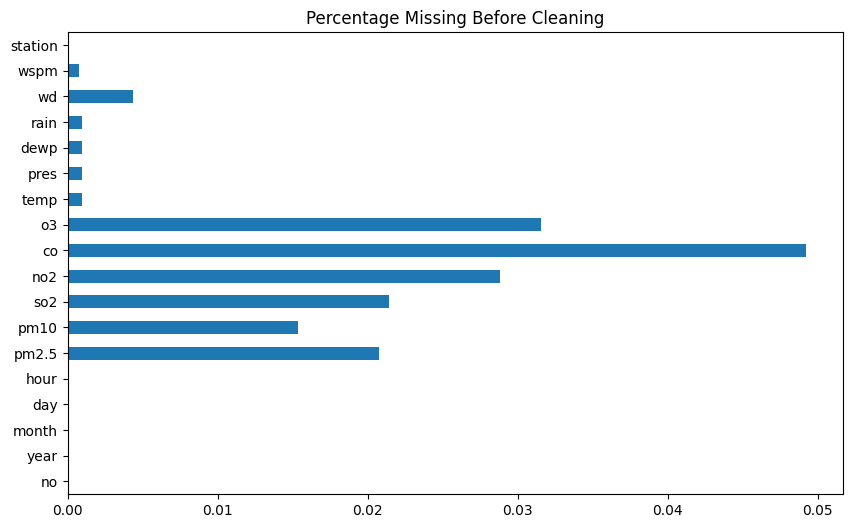

In [30]:
df.isna().mean().plot(kind="barh", figsize=(10,6), title="Percentage Missing Before Cleaning")
plt.show()

## Handle Missing Data

### Interpolate weather variables:

In [31]:
weather_cols = ["temp", "pres", "dewp", "wspm"] # Define weather-related columns
df[weather_cols] = df[weather_cols].interpolate(method="time") # Interpolate missing weather data
builder.add_step("Handled missing values in weather-related columns") # Add step to metadata

### Fill RAIN and wd:

In [32]:
df["rain"] = df["rain"].fillna(0) # Fill missing rain values with 0
df["wd"] = df["wd"].ffill() # Forward fill missing wind direction values
builder.add_step("Handled missing values in rain and wd columns") # Add step to metadata

### Interpolate PM2.5:

In [33]:
df["pm2.5"] = df["pm2.5"].interpolate(method="time") # Interpolate missing PM2.5 values
builder.add_step("Interpolated missing PM2.5 values") # Add step to metadata

### Re-check:

In [34]:
df.isna().sum()

no             0
year           0
month          0
day            0
hour           0
pm2.5          0
pm10        6449
so2         9021
no2        12116
co         20701
o3         13277
temp           0
pres           0
dewp           0
rain           0
wd             0
wspm           0
station        0
dtype: int64

---

## Remove Unnecessary Columns

In [35]:
df = df.reset_index() # Reset index to make datetime a column again
df = df.drop(columns=[
    "no","year","month","day","hour",
    "pm10","so2","no2","co","o3"
]) # Drop unnecessary columns
df.info()
builder.add_step("Dropped unused pollutant columns (PM10, SO2, NO2, CO, O3)") # Add step to metadata
builder.add_step("Dropped redundant time columns (no, year, month, day, hour)") # Add step to metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  420768 non-null  datetime64[ns]
 1   pm2.5     420768 non-null  float64       
 2   temp      420768 non-null  float64       
 3   pres      420768 non-null  float64       
 4   dewp      420768 non-null  float64       
 5   rain      420768 non-null  float64       
 6   wd        420768 non-null  category      
 7   wspm      420768 non-null  float64       
 8   station   420768 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(6)
memory usage: 23.3 MB


---

## Remove incomplete 2017 data

The Beijing dataset ends part-way through 2017, so we drop this year to ensure full seasonal cycles.

In [36]:
print("Years before filtering:", df['datetime'].dt.year.unique()) # Check years before filtering


Years before filtering: [2013 2014 2015 2016 2017]


In [37]:
df = df[df['datetime'].dt.year < 2017].copy() # Filter out data from 2017 onwards
builder.add_step("Filtered out data from 2017 onwards") # Add step to metadata

In [38]:
print("Years after filtering:", df['datetime'].dt.year.unique())
print(f"Remaining rows after removing 2017: {len(df):,}")

Years after filtering: [2013 2014 2015 2016]
Remaining rows after removing 2017: 403,776


## Duplicate Handling

Check for duplicates:

In [39]:
df.duplicated().sum() # Check for duplicate rows

0

Remove duplicates:

In [40]:
df = df.drop_duplicates() # Drop duplicate rows
builder.add_step("Removed duplicate rows") # Add step to metadata

---

## Final Missing Data Check

In [41]:
df.isna().sum() # Final check for missing values
builder.add_step("Verified cleaned dataset structure") # Add step to metadata


---

## Save Cleaned Dataset

Export the cleaned dataset:

In [42]:
df.to_csv(output_path, index=False)
print("Saved cleaned dataset to:", output_path)

Saved cleaned dataset to: /home/robert/Projects/beijing-air-quality/data/cleaned/beijing_cleaned.csv


## Save metadata file

In [43]:
builder.add_columns(df.columns) # Add columns the dataframe
builder.add_record_count_from_df(df) # Set record count from the cleaned dataframe    
builder.add_record_stats(output_path) # Add record statistics

builder.write(project_root / "data" /"cleaned" / "_metadata.yml") # Write metadata to YAML

📄 Metadata written to: /home/robert/Projects/beijing-air-quality/data/cleaned/_metadata.yml
